In [1]:
import numpy as np
import emcee
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import time 
from scipy.stats import norm, laplace
from scipy.stats import anderson_ksamp, ks_2samp, shapiro
from scipy.optimize import curve_fit

In [3]:
info = pd.read_csv("../csvs/resonant/Gaussian_Fits_317.csv")
info.head()

,ID,Probability,Mean,Sigma,Mean_Error,Sigma_Error,Determinant
0,0.0,0.476693,3.786055,3.751443e-01,0.016966,0.011563,3.848582e-08
1,1.0,inf,8.000000,2.424749e-53,inf,inf,inf
2,2.0,inf,8.000000,2.962301e-50,inf,inf,inf
3,3.0,0.590160,6.841539,3.056313e-01,0.013744,0.009843,1.829682e-08
4,4.0,0.761169,5.687744,2.387079e-01,0.010759,0.007405,6.341003e-09


In [5]:
significance_scores = pd.read_csv("../csvs/resonant/significance_scores.csv", index_col=0)
significance_scores.head()

,ID,Anderson_P,KS_P,ShapiroW
0,100.0,0.000031,0.000029,7.678782e-24
1,101.0,0.022468,0.010125,3.526777e-08
2,108.0,0.419460,0.449255,5.864905e-06
3,109.0,0.670769,0.655550,3.596655e-06
4,113.0,0.024880,0.046678,7.397713e-13


In [6]:
ranked_scores = significance_scores.sort_values("KS_P", ascending=False)
ranked_scores.head()

,ID,Anderson_P,KS_P,ShapiroW
94,304.0,0.000000,1.000000,1.000000e+00
131,358.0,0.992461,0.957167,2.553660e-01
127,3.0,0.919871,0.957167,1.789452e-07
104,320.0,0.848374,0.957167,1.849014e-02
72,259.0,0.903742,0.930714,4.700140e-02


In [13]:
def plot_random_hists( planet_systems,title=None):
    ncol, nrow = 3,len(planet_systems)//3
    if (len(planet_systems)%3 != 0):
        nrow +=1
    fig, axarr = plt.subplots(ncols=ncol,nrows=nrow)
    fig.set_size_inches((15, nrow*3))
    for jj , planet_sys in enumerate(planet_systems[:ncol*nrow]):
        data = pd.read_csv("../csvs/resonant/resonant_features/" + planet_sys, index_col=0)
    
        data = data[data["t"]<1e8]
        data["logt"] = np.log10(data["t"])
        name = planet_sys.split("_")[2]
        # make guassian
        mean, sigma =  info[info["ID"]==int(name)][["Mean", "Sigma"]].values[0]

        x = np.linspace(mean - sigma*4, mean+sigma*4, 100)
        rv = norm(loc = mean, scale = sigma)
        axarr[jj//ncol, jj%ncol ].plot(x, rv.pdf(x), linewidth = 4, color = "black")
        data.hist("logt",  ax = axarr[jj//ncol, jj%ncol],  label = name + " Mean - " +str("{0:.3f}".format(mean)) + " Sigma - "+ str("{0:.3f}".format(sigma)), alpha = 0.7, normed = 1, color = "purple", edgecolor = "black", bins = 20)
        axarr[jj//ncol, jj%ncol ].set_title(name + r': $\mu$=' +str("{0:.3f}".format(mean)) + r': $\sigma$='+ str("{0:.3f}".format(sigma)))
    plt.show()

['Res_sys_358_500.csv', 'Res_sys_3_500.csv', 'Res_sys_320_500.csv', 'Res_sys_259_500.csv', 'Res_sys_323_500.csv', 'Res_sys_48_500.csv']


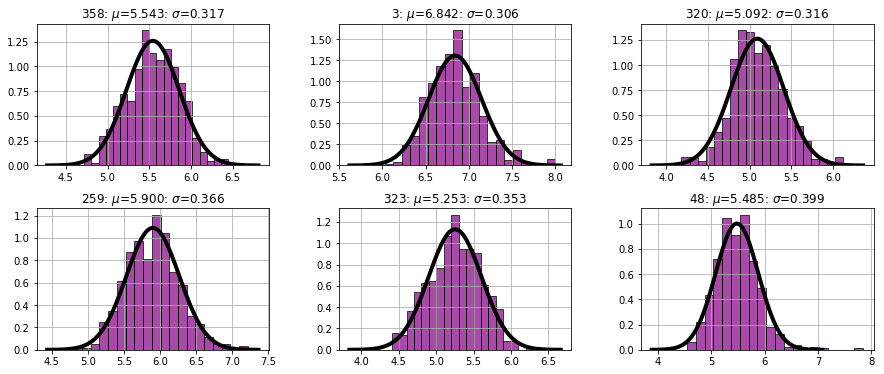

In [21]:
very_gaussian = ranked_scores.head(7)["ID"]
# The first shows a score of 1, but is infact actually faulty, as
# that distribution has one instability time occuring over and over again
# which for some reason has a KS score of 1 as well ...
very_gaussian = ["Res_sys_{0}_500.csv".format(int(x))  for x in very_gaussian][1:]
print (very_gaussian)
plot_random_hists(very_gaussian)